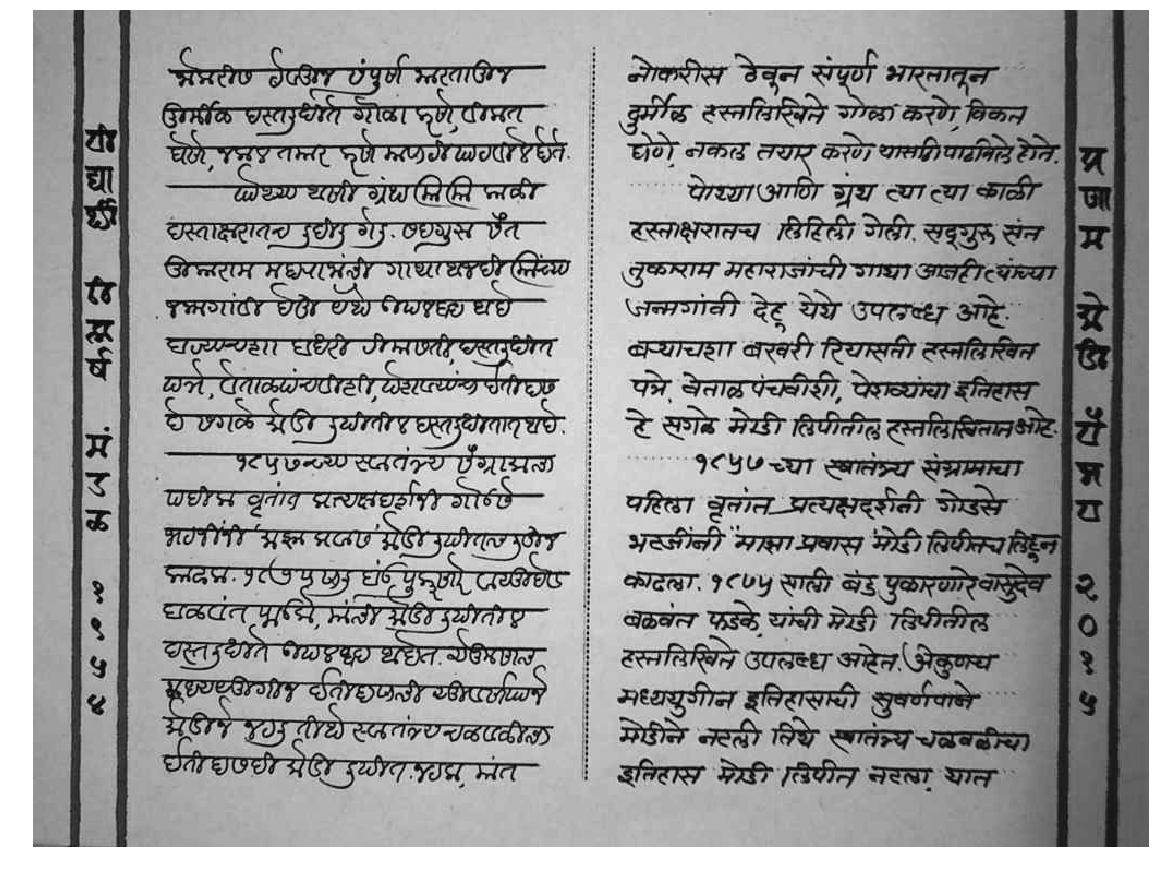

In [104]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img = rgb2gray(imread("/Users/muthukrishnan/programming/line-segmentation-handwritten-doc/Pic08-02-15_150040.jpg"))
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

### Binarize the image using Otsu thresholding

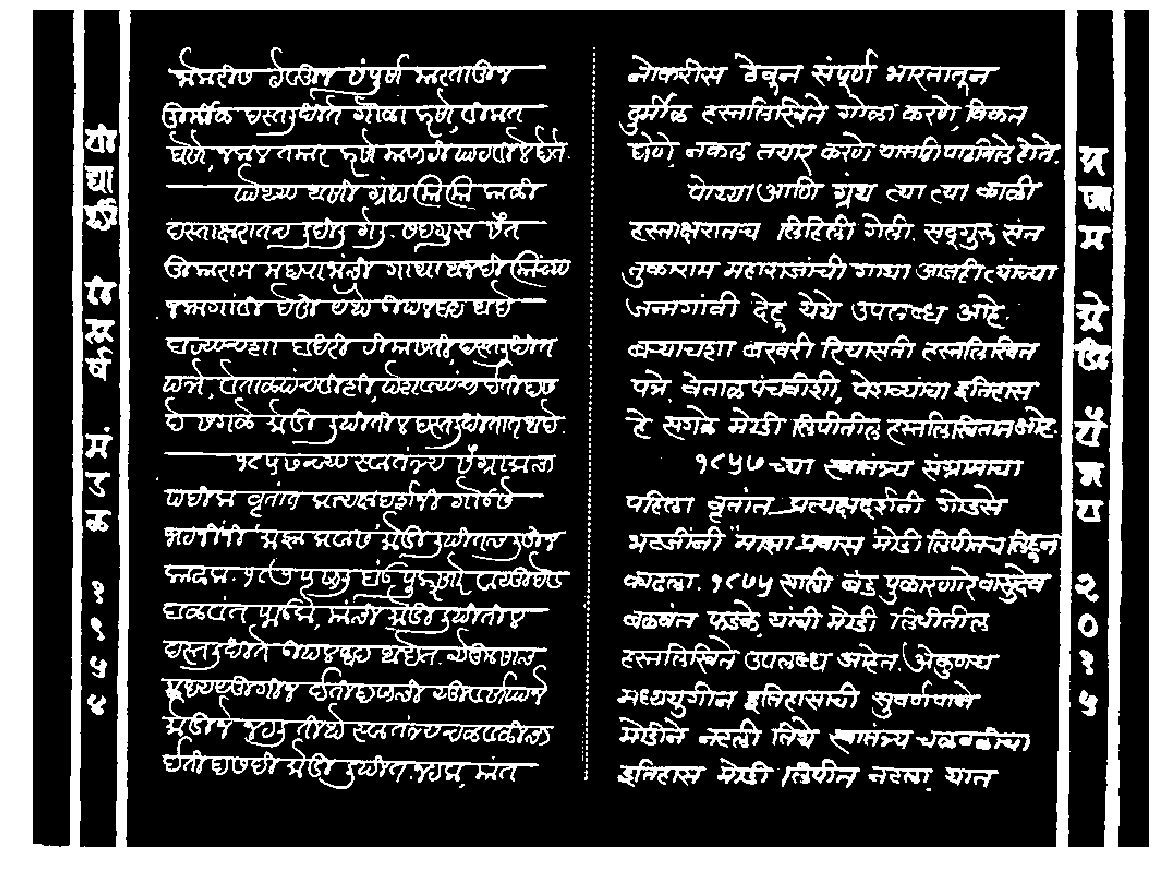

In [105]:
from skimage.filters import threshold_otsu 
from skimage.morphology import binary_closing, binary_erosion
import numpy as np
from skimage import feature

#binarize the image
binary_imag = np.ones(img.shape)
r,c = img.shape
divider = 4
for ri in range(divider):
    for ci in range(divider):
        region = img[int((ri/divider)*r):int((ri/divider+1/divider)*r), int((ci/divider)*c):int((ci/divider+1/divider)*c)]
        thresh = threshold_otsu(region)
        binary_imag[int((ri/divider)*r):int((ri/divider+1/divider)*r), int((ci/divider)*c):int((ci/divider+1/divider)*c)] = region < thresh

plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(binary_imag, cmap="gray")
plt.show()

### Remove the thick lines as part of pre processing step.

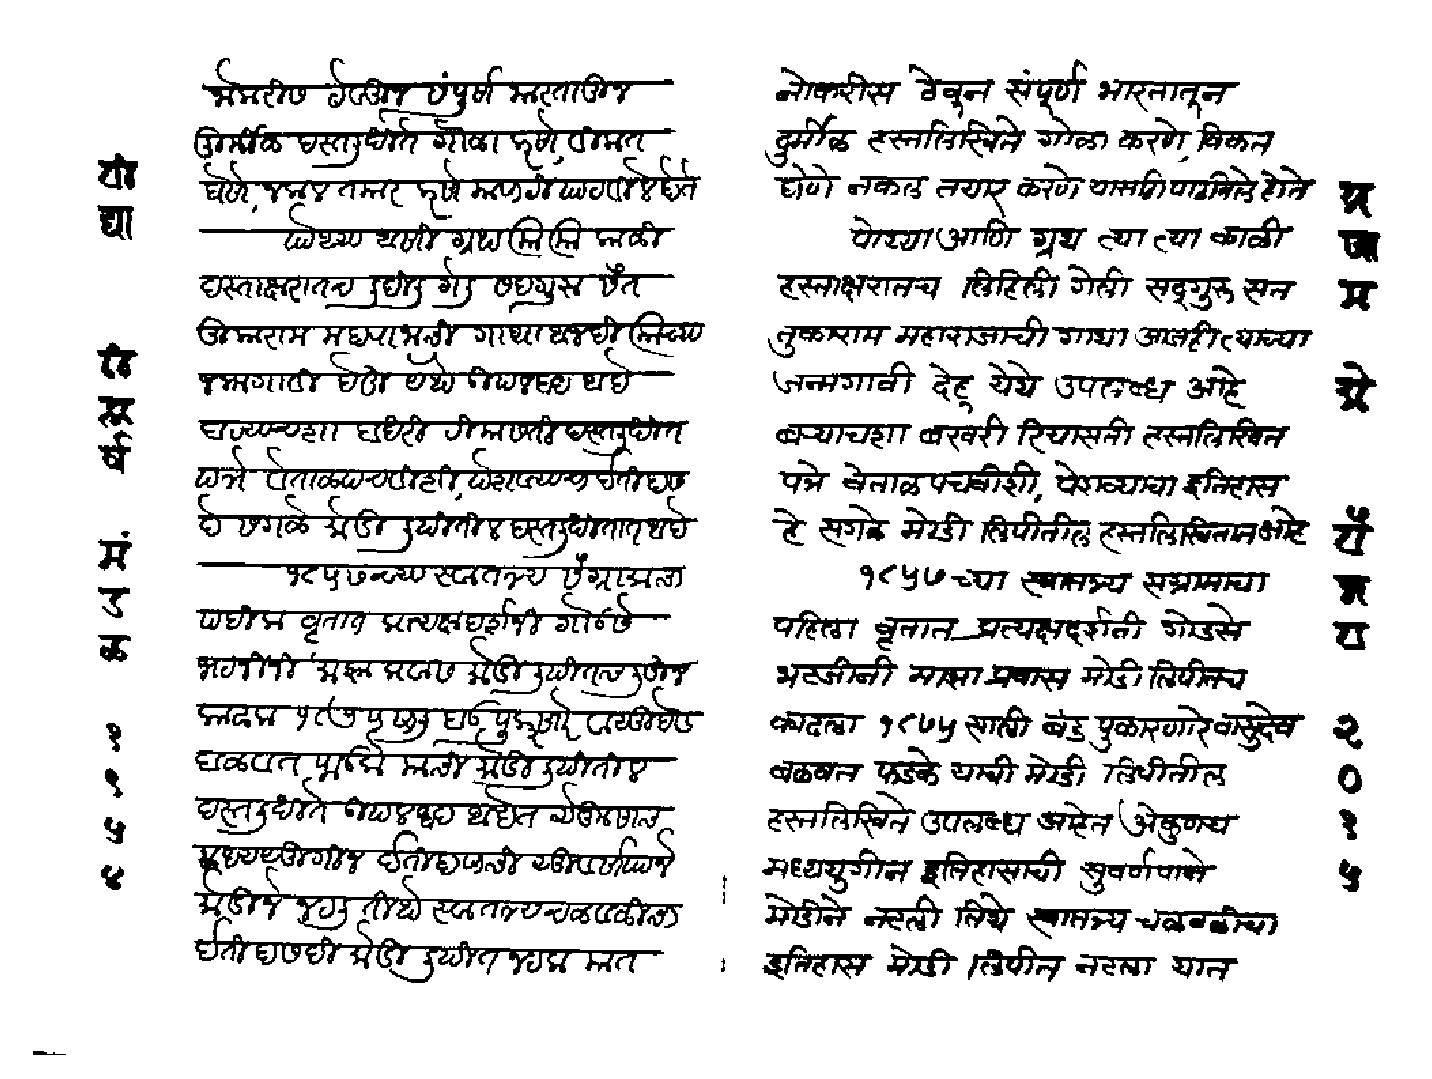

In [112]:
from skimage.measure import label, regionprops
from skimage.util import invert 

label_image = label(binary_imag)

fig, ax = plt.subplots(figsize=(20,20))

image_blocks = []
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    height = maxr - minr
    width = maxc - minc
    # if height is more than 75% of the image, clear it from the image.
    if height > binary_imag.shape[0]*0.75:
        coords = region.coords
        for coord in coords:
            binary_imag[coord[0],coord[1]] = 0
    elif region.area < 15 or region.extent < 0.05 or height/width < 0.06:
        coords = region.coords
        for coord in coords:
            binary_imag[coord[0],coord[1]] = 0
    else:
        image_blocks.append(region)

ax.imshow(invert(binary_imag), cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

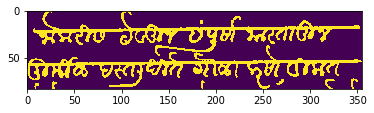

In [114]:
def show_image_in_region(region):
    minr, minc, maxr, maxc = region.bbox
    plt.imshow(binary_imag[minr:maxr,minc:maxc])
show_image_in_region(image_blocks[0])

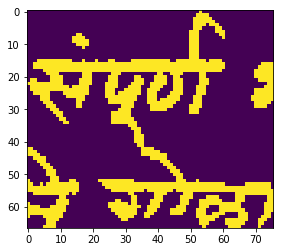

In [115]:
show_image_in_region(image_blocks[1])

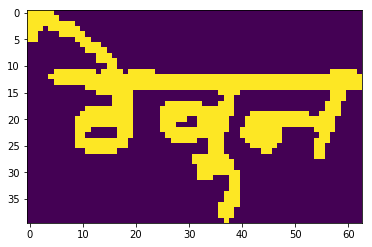

In [116]:
show_image_in_region(image_blocks[2])

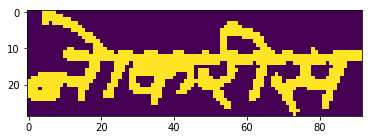

In [117]:
show_image_in_region(image_blocks[3])

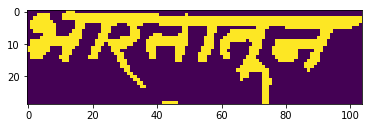

In [120]:
show_image_in_region(image_blocks[6])